In [1]:
import pandas as pd
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')


In [2]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
import numpy as np
(np.unique(train_data['PassengerId'].values).size, 
 np.unique(train_data['PassengerId'].values).size == train_data.shape[0])


(891, True)

In [5]:
train_data.set_index(['PassengerId'], inplace=True)
train_data.head(0)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [6]:
import re
patt = re.compile('\s(\S+\.)') # 1 whitespace character followed by several

titles = np.array([re.search(patt, i)[1] for i in train_data['Name'].values])

print('Unique titles ({}): \n{}'.format(np.unique(titles).shape[0], np.unique(titles)))
print('')
print('Number of titles that are NaN/Null: {}'.format(pd.isnull(titles).sum()))




Unique titles (17): 
['Capt.' 'Col.' 'Countess.' 'Don.' 'Dr.' 'Jonkheer.' 'Lady.' 'Major.'
 'Master.' 'Miss.' 'Mlle.' 'Mme.' 'Mr.' 'Mrs.' 'Ms.' 'Rev.' 'Sir.']

Number of titles that are NaN/Null: 0


In [7]:
train_data = train_data.assign(Title=titles)
train_data = train_data.drop('Name', axis=1)

In [8]:
train_data['Title'].groupby(train_data['Title']).size()

Title
Capt.          1
Col.           2
Countess.      1
Don.           1
Dr.            7
Jonkheer.      1
Lady.          1
Major.         2
Master.       40
Miss.        182
Mlle.          2
Mme.           1
Mr.          517
Mrs.         125
Ms.            1
Rev.           6
Sir.           1
Name: Title, dtype: int64

In [9]:
# Replace titles as per the specified categories
train_data['Title'] = train_data['Title'].replace('Mlle.', 'Miss.')
train_data['Title'] = train_data['Title'].replace('Ms.', 'Miss.')
train_data['Title'] = train_data['Title'].replace('Mme.', 'Mrs.')
train_data['Title'] = train_data['Title'].replace(['Capt.', 'Col.', 'Major.'], 'Army.')
train_data['Title'] = train_data['Title'].replace(['Countess.', 'Don.', 'Jonkheer.', 'Lady.', 'Sir.'], 'Noble.')

# Display the number of passengers and average survival for each title
print('Number of passengers:\n{}'.format(train_data.groupby('Title').size()))
print('')
print('Average survival:\n{}'.format(train_data[['Title', 'Survived']].groupby('Title').mean()))


Number of passengers:
Title
Army.        5
Dr.          7
Master.     40
Miss.      185
Mr.        517
Mrs.       126
Noble.       5
Rev.         6
dtype: int64

Average survival:
         Survived
Title            
Army.    0.400000
Dr.      0.428571
Master.  0.575000
Miss.    0.702703
Mr.      0.156673
Mrs.     0.793651
Noble.   0.600000
Rev.     0.000000


In [10]:
train_data = train_data.drop('Ticket', axis=1)
train_data.head(0)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,


In [11]:
def getCabinCat(cabin_code):
    if pd.isnull(cabin_code):
        cat = 'None' #Use astring so that it is clear that this is a category on its own
    else:
        cat = cabin_code[0]
    return cat    
        

In [12]:
cabin_cats = np.array([getCabinCat(cc)for cc in train_data['Cabin'].values])

In [13]:
#Let's add this as a new 'Cabin_cat' feature to the DataFrame, and remove the 'Cabin' feature

train_data = train_data.assign(Cabin_cat=cabin_cats)
train_data = train_data.drop('Cabin', axis=1)
train_data.head(0)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_cat
PassengerId,,,,,,,,,,


In [14]:
# To get as idea about the distribution of passengers amongst the cabin categories
print('Number of passengers:\n{}'.format(train_data['Cabin_cat'].
                                        groupby(train_data['Cabin_cat']).size()))

Number of passengers:
Cabin_cat
A        15
B        47
C        59
D        33
E        32
F        13
G         4
None    687
T         1
Name: Cabin_cat, dtype: int64


In [15]:
# Exploratory data analysis

survived_data = train_data.loc[train_data['Survived']==1,:]
died_data = train_data.loc[train_data['Survived']==0,:]


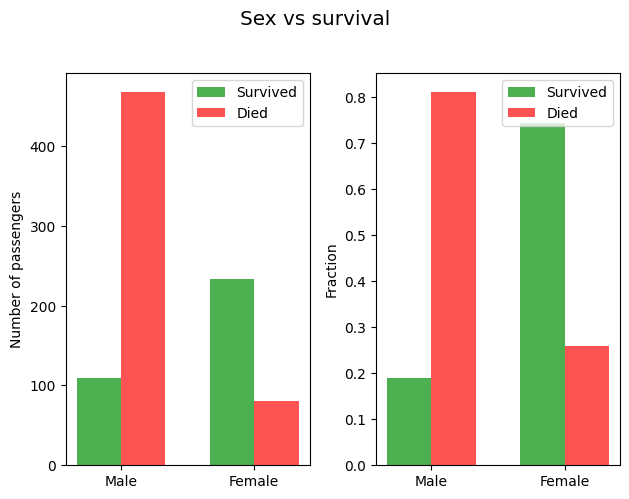

In [16]:
# Split the survived and died data between male and female
survived_male_data = survived_data.loc[survived_data['Sex'] == 'male', :]
died_male_data = died_data.loc[died_data['Sex'] == 'male', :]
survived_female_data = survived_data.loc[survived_data['Sex'] == 'female', :]
died_female_data = died_data.loc[died_data['Sex'] == 'female', :]

# Total number of males and females that survived and died
survived_male_n = survived_male_data.shape[0]
died_male_n = died_male_data.shape[0]
survived_female_n = survived_female_data.shape[0]
died_female_n = died_female_data.shape[0]


import matplotlib.pyplot as plt

# Define professional colors
survived_color = '#4CAF50'  # Green
died_color = '#FF5252'  # Red

# Bar plotting
fig, axes = plt.subplots(nrows=1, ncols=2)

# Comparing number of survivals and sex
plt.sca(axes[0])  # Use plt.sca to set the current axis
survived = plt.bar([0.5, 3.5], [survived_male_n, survived_female_n], width=1, color=survived_color)
died = plt.bar([1.5, 4.5], [died_male_n, died_female_n], width=1, color=died_color)
plt.xticks([1, 4], ('Male', 'Female'))
plt.ylabel('Number of passengers')
plt.legend((survived, died), ('Survived', 'Died'), loc=0, fontsize='medium')

# Survival vs Sex in fractions
plt.sca(axes[1])  # Use plt.sca to set the current axis
survived_pct = plt.bar([0.5, 3.5], [survived_male_n / (survived_male_n + died_male_n), survived_female_n / (survived_female_n + died_female_n)], width=1, color=survived_color)
died_pct = plt.bar([1.5, 4.5], [died_male_n / (survived_male_n + died_male_n), died_female_n / (survived_female_n + died_female_n)], width=1, color=died_color)
plt.xticks([1, 4], ('Male', 'Female'))
plt.ylabel('Fraction')
plt.legend((survived_pct, died_pct), ('Survived', 'Died'), fontsize='medium')  # Fix the legend
fig.suptitle('Sex vs survival', fontsize='x-large', y=1.03)  # Fix the subtitle method
plt.tight_layout()
plt.show()


In [17]:
# Function to check for NaNs and return non-NaN values
def checkNans(arr, arr2=None):
    mask_nan = np.isnan(arr)
    if mask_nan.sum() > 0:
        any_nan = True
    else:
        any_nan = False
    n_nan = mask_nan.abs().sum()

    masked_arr = arr[~mask_nan]
    if arr2 is not None:
        masked_arr2 = arr2[~mask_nan]
        return any_nan, n_nan, masked_arr, masked_arr2
    else:
        return any_nan, n_nan, masked_arr

Survived Age Range: 52 - 52
Died Age Range: 125 - 125
Combined Age Range: 52 - 125


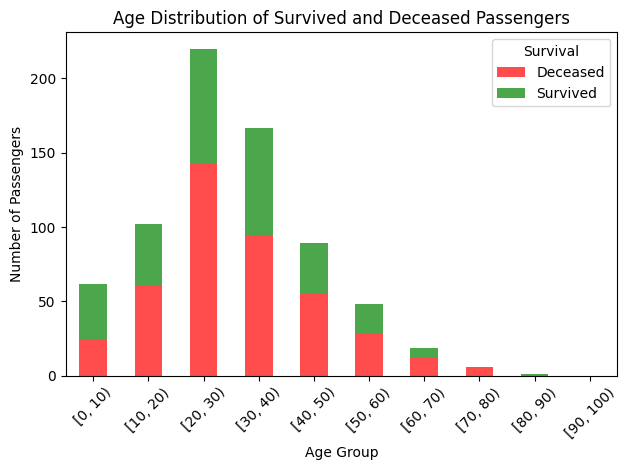

In [18]:
# Extract age data of the survived and died passengers, check for NaNs
survived_age = checkNans(survived_data['Age'])[1]
died_age = checkNans(died_data['Age'])[1]

# Determine bin edges of the combined data to ensure equal bin widths for both groups
stacked = np.hstack((survived_age, died_age))

# Print information for debugging
print("Survived Age Range:", survived_age.min(), "-", survived_age.max())
print("Died Age Range:", died_age.min(), "-", died_age.max())
print("Combined Age Range:", stacked.min(), "-", stacked.max())

# Create a new column 'AgeGroup' to categorize passengers into age groups
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=bins, right=False)

# Group by 'AgeGroup' and 'Survived', then count the number of passengers in each group
age_survival_counts = train_data.groupby(['AgeGroup', 'Survived']).size().unstack()

# Plot the bar chart
ax = age_survival_counts.plot(kind='bar', stacked=True, color=['red', 'green'], alpha=0.7)

# Customize the plot
plt.title('Age Distribution of Survived and Deceased Passengers')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.legend(['Deceased', 'Survived'], loc='upper right', title='Survival')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


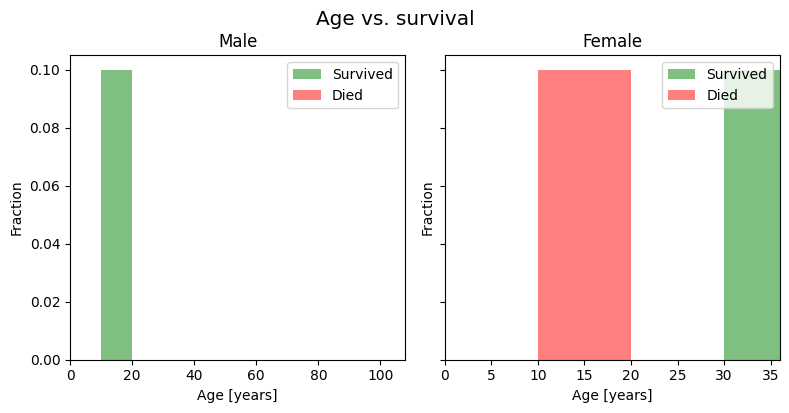

Survived Male Ages: 16
Died Male Ages: 108
Survived Female Ages: 36
Died Female Ages: 17


In [19]:
import matplotlib.patches as mpatches

# Extract age data of the survived and died passengers for males 
# and females separately, check for nans
survived_male_age = checkNans(survived_male_data['Age'])[1]
died_male_age = checkNans(died_male_data['Age'])[1]
survived_female_age = checkNans(survived_female_data['Age'])[1]
died_female_age = checkNans(died_female_data['Age'])[1]

# Create patches for legend handles
survived_handle = mpatches.Patch(facecolor='green', alpha=0.5, label='Survived')
died_handle = mpatches.Patch(facecolor='red', alpha=0.5, label='Died')

# Histogram
# Create subplots with shared y-axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharey=True)

# Male histogram
plt.axes(axes[0])
survived_male = plt.hist(survived_male_age, bins, density=1, facecolor='green', alpha=0.5, label='Survived')
died_male = plt.hist(died_male_age, bins, density=1, facecolor='red', alpha=0.5, label='Died')
plt.legend(handles=[survived_handle, died_handle], loc='upper right', fontsize='medium')
plt.title('Male')
plt.xlabel('Age [years]')
plt.ylabel('Fraction')
plt.xlim([0, max(survived_male_age.max(), died_male_age.max())])
plt.tight_layout()

# Female histogram
plt.axes(axes[1])
survived_female = plt.hist(survived_female_age, bins, density=1, facecolor='green', alpha=0.5, label='Survived')
died_female = plt.hist(died_female_age, bins, density=1, facecolor='red', alpha=0.5, label='Died')
plt.legend(handles=[survived_handle, died_handle], loc='upper right', fontsize='medium')
plt.title('Female')
plt.xlabel('Age [years]')
plt.ylabel('Fraction')
plt.xlim([0, max(survived_female_age.max(), died_female_age.max())])
plt.tight_layout()
fig.suptitle('Age vs. survival', fontsize='x-large', y=1.02)
plt.show()
print("Survived Male Ages:", survived_male_age)
print("Died Male Ages:", died_male_age)
print("Survived Female Ages:", survived_female_age)
print("Died Female Ages:", died_female_age)


In [20]:
print('Number of males aged <10: {}'.format(np.count_nonzero(died_male_age < 10)))
print('Number of females aged <10: {}'.format(np.count_nonzero(died_female_age < 10)))


Number of males aged <10: 0
Number of females aged <10: 0
